<a href="https://colab.research.google.com/github/appersaravanan/Semeter-2-Assignment-1/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pyplot as plt
from math import ceil, floor
import random
from random import randrange

In [4]:
def show_imgs(images):
    fig, axs = plt.subplots(4, 4)
    cnt = 0
    for i in range(4):
        for j in range(4):
            axs[i,j].imshow(images[cnt])
            axs[i,j].axis('off')
            cnt += 1
    
    
    plt.show()

#Load cifar10 dataset

In [5]:

(x_train,y_train),(x_test,y_test) =cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


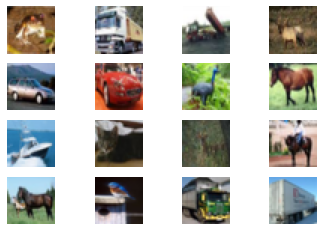

In [6]:
show_imgs(x_train)

# Normalization


In [7]:
batch_size=128
print(x_train.min() , x_train.max())
x_train = x_train- x_train.min() / x_train.max()- x_train.min()
x_train =x_train/255
print(x_train.min() , x_train.max())



0 255
0.0 1.0


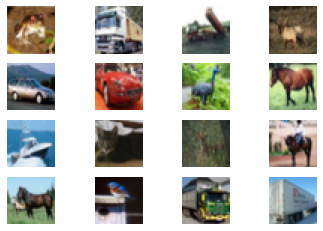

In [8]:
show_imgs(x_train)

##Hold-out defination

In [9]:
def hold_out(ds,labels, train_ds_size,vald_ds_size):
  if ds is None:
      raise ValueError("ds can't be empty")
  # print(len(ds))
 
  if isinstance(train_ds_size, float) and isinstance(vald_ds_size, float) and (train_ds_size+vald_ds_size>1.0) :
    raise ValueError("Split size is greater the dataset size")
  train_count=ceil(train_ds_size* len(ds))

  valid_count=ceil(vald_ds_size* len(ds))
  # print(train_count)
  # print(valid_count)
  # print(ds[:train_count].shape)
  # print(ds[train_count:(train_count+valid_count)].shape)
  return ds[:train_count],ds[train_count:(train_count+valid_count)],labels[:train_count],labels[train_count:(train_count+valid_count)]

In [33]:
def k_fold_split(no_of_folds):
    fold_counts= int(len(x_train)  // no_of_folds)
    fold_sizes = np.full(no_of_folds, fold_counts , dtype=np.int)
    fold_sizes[:fold_counts%no_of_folds]  +=1
    start_index,stop_index,fold_end_index= 0,0,0
    for fold_index in fold_sizes:
      start_index,stop_index =fold_end_index,fold_end_index+fold_index
      yield x_train[start_index:stop_index],y_train[start_index:stop_index]
      fold_end_index=stop_index



In [36]:
k_fold_split_next_ref = k_fold_split(100)
folds_ds_list,folds_label_list= list(), list();
while True:
  try:
        x_batch,y_batch=next(k_fold_split_next_ref)
        folds_ds_list.append(x_batch)
        folds_label_list.append(y_batch)
        #print( str(count)+ " Validation dataset"+ str(x_batch.shape) +" Label :"+ str(y_batch.shape) )
        
  except StopIteration:
     break



In [39]:
def get_dataset_validation_set_from_folds():
    start_index,stop_index,fold_end_index= -1,0,0
    for i in range(len(folds_ds_list)):
      print(start_index+1,start_index+2, len(folds_ds_list),start_index+1)
      start_index +=1
      #yield folds_ds_list[0:start_index+1] +folds_ds_list[start_index+2: len(folds_ds_list)] ,folds_ds_list[start_index+1]
get_dataset_validation_set_from_folds()    

0 1 100 0
1 2 100 1
2 3 100 2
3 4 100 3
4 5 100 4
5 6 100 5
6 7 100 6
7 8 100 7
8 9 100 8
9 10 100 9
10 11 100 10
11 12 100 11
12 13 100 12
13 14 100 13
14 15 100 14
15 16 100 15
16 17 100 16
17 18 100 17
18 19 100 18
19 20 100 19
20 21 100 20
21 22 100 21
22 23 100 22
23 24 100 23
24 25 100 24
25 26 100 25
26 27 100 26
27 28 100 27
28 29 100 28
29 30 100 29
30 31 100 30
31 32 100 31
32 33 100 32
33 34 100 33
34 35 100 34
35 36 100 35
36 37 100 36
37 38 100 37
38 39 100 38
39 40 100 39
40 41 100 40
41 42 100 41
42 43 100 42
43 44 100 43
44 45 100 44
45 46 100 45
46 47 100 46
47 48 100 47
48 49 100 48
49 50 100 49
50 51 100 50
51 52 100 51
52 53 100 52
53 54 100 53
54 55 100 54
55 56 100 55
56 57 100 56
57 58 100 57
58 59 100 58
59 60 100 59
60 61 100 60
61 62 100 61
62 63 100 62
63 64 100 63
64 65 100 64
65 66 100 65
66 67 100 66
67 68 100 67
68 69 100 68
69 70 100 69
70 71 100 70
71 72 100 71
72 73 100 72
73 74 100 73
74 75 100 74
75 76 100 75
76 77 100 76
77 78 100 77
78 79 100 78
79

In [10]:
def k_fold_cross_validation(ds,labels_train,fold_count):
    ds_fold=ceil(len(ds)/fold_count)
   
    fold_list=list();
    label_fold_list=list()
    for i in range(fold_count):
      
      fold_entires=list();
      fold_list.append(fold_entires)
      label_fold=list();
      label_fold_list.append(label_fold)
      #rand_indices=random.sample(range(0, len(ds)), ds_fold)
      #  print(rand_indices)
      # print(len(fold_list))
      while len(fold_entires) < ds_fold:     
        index = randrange(len(ds))
        label_fold.append(labels_train.pop(index))
        fold_entires.append(ds.pop(index))
      
      # for k in range(len(rand_indices)): 
      #   ds.pop(k-1)
    return fold_list,label_fold_list;
image_list,label_list=k_fold_cross_validation(list(x_train),list(y_train),50)
# print(image_list)
# print(label_list)


In [11]:
validation_ds_fold_list=list()
validation_label_fold_list=list()

def create_validation_from_k_fold(validation_count_from_each_fold=3):
   for i in image_list:
   
     validation_count_from_each_fold_index=0    
    #  print(i)
     while validation_count_from_each_fold_index < validation_count_from_each_fold:
       index = randrange(len(i))
       validation_ds_fold_list.append(i.pop(index))
      #  validation_label_fold_list.append(label_list[i].pop(index))
       validation_count_from_each_fold_index+=1
create_validation_from_k_fold(30);


In [12]:
print(len(validation_ds_fold_list))
print(len(image_list[0]))


1500
970


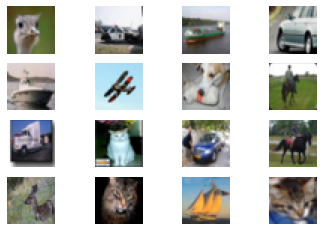

In [13]:
show_imgs(image_list[0])

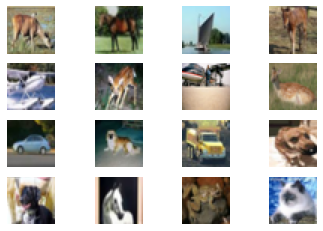

In [14]:
show_imgs(validation_ds_fold_list)

In [15]:
x_train_split, x_vald_split,y_train_split,y_vald_split= hold_out(x_train,y_train,0.7,0.3)
x_train_split
print(x_train_split.shape)
print(y_train_split.shape)
print(x_vald_split.shape)
print(y_vald_split.shape)


(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)


In [16]:
batch_size=128
print(len(x_train))
print(len(x_train)/batch_size)
print(len(x_train)%batch_size)
def get_batch_data(batch_size=64):
   if len(x_train)<batch_size:
     raise ValueError("Batch size should be smaller than x_train size")
   batch_count=int(len(x_train)/batch_size)
   batch_rest=int(len(x_train)%batch_size)
   startindex=0;
   cur_batch_index=0;
   for i in range(batch_count):
      cur_batch_index=i
      batch_end=startindex+batch_size
      x_batch= x_train[startindex:batch_end]
      y_batch=y_train[startindex:batch_end]
      yield x_batch,y_batch
      startindex=batch_end
      #print(cur_batch_index,batch_count-1)
   if batch_rest>0 and cur_batch_index== batch_count-1:
     
      batch_end=batch_end+batch_rest
      x_batch= x_train[startindex:batch_end]
      y_batch=y_train[startindex:batch_end]
      yield x_batch,y_batch;
  
   
gen=get_batch_data(128)   ;





50000
390.625
80


(128, 32, 32, 3)
128


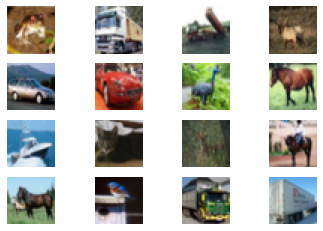

In [17]:
x_batch_2,y_batch_2=next(gen)
print(x_batch_2.shape)
print(len(y_batch_2))
show_imgs(x_batch_2)

In [18]:
count=1
while True:
  try:
        x_batch_2,y_batch_2=next(gen)
        print( str(count)+ " Validation dataset"+ str(x_batch_2.shape) +" Label :"+ str(y_batch_2.shape) )
        count+=1
  except StopIteration:
     break
  

1 Validation dataset(128, 32, 32, 3) Label :(128, 1)
2 Validation dataset(128, 32, 32, 3) Label :(128, 1)
3 Validation dataset(128, 32, 32, 3) Label :(128, 1)
4 Validation dataset(128, 32, 32, 3) Label :(128, 1)
5 Validation dataset(128, 32, 32, 3) Label :(128, 1)
6 Validation dataset(128, 32, 32, 3) Label :(128, 1)
7 Validation dataset(128, 32, 32, 3) Label :(128, 1)
8 Validation dataset(128, 32, 32, 3) Label :(128, 1)
9 Validation dataset(128, 32, 32, 3) Label :(128, 1)
10 Validation dataset(128, 32, 32, 3) Label :(128, 1)
11 Validation dataset(128, 32, 32, 3) Label :(128, 1)
12 Validation dataset(128, 32, 32, 3) Label :(128, 1)
13 Validation dataset(128, 32, 32, 3) Label :(128, 1)
14 Validation dataset(128, 32, 32, 3) Label :(128, 1)
15 Validation dataset(128, 32, 32, 3) Label :(128, 1)
16 Validation dataset(128, 32, 32, 3) Label :(128, 1)
17 Validation dataset(128, 32, 32, 3) Label :(128, 1)
18 Validation dataset(128, 32, 32, 3) Label :(128, 1)
19 Validation dataset(128, 32, 32, 3)